# Loan Providing Company

## Problem Statement - I

### Business Understanding
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

### Business Objectives
This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough.

## Problem Statement - II
Results Expected by Learners
Present the overall approach of the analysis in a presentation. Mention the problem statement and the analysis approach briefly.

Identify the missing data and use appropriate method to deal with it. (Remove columns/or replace it with an appropriate value)

#### Hint: Note that in EDA, since it is not necessary to replace the missing value, but if you have to replace the missing value, what should be the approach. Clearly mention the approach.

Identify if there are outliers in the dataset. Also, mention why do you think it is an outlier. Again, remember that for this exercise, it is not necessary to remove any data points.

Identify if there is data imbalance in the data. Find the ratio of data imbalance.

#### Hint: How will you analyse the data in case of data imbalance? You can plot more than one type of plot to analyse the different aspects due to data imbalance. For example, you can choose your own scale for the graphs, i.e. one can plot in terms of percentage or absolute value. Do this analysis for the ‘Target variable’ in the dataset ( clients with payment difficulties and all other cases). Use a mix of univariate and bivariate analysis etc.

 

#### Hint: Since there are a lot of columns, you can run your analysis in loops for the appropriate columns and find the insights.

Explain the results of univariate, segmented univariate, bivariate analysis, etc. in business terms.

Find the top 10 correlation for the Client with payment difficulties and all other cases (Target variable). Note that you have to find the top correlation by segmenting the data frame w.r.t to the target variable and then find the top correlation for each of the segmented data and find if any insight is there.  Say, there are 5+1(target) variables in a dataset: Var1, Var2, Var3, Var4, Var5, Target. And if you have to find top 3 correlation, it can be: Var1 & Var2, Var2 & Var3, Var1 & Var3. Target variable will not feature in this correlation as it is a categorical variable and not a continuous variable which is increasing or decreasing.  

Include visualisations and summarise the most important results in the presentation. You are free to choose the graphs which explain the numerical/categorical variables. Insights should explain why the variable is important for differentiating the clients with payment difficulties with all other cases. 

 

You need to submit one/two Ipython notebook which clearly explains the thought process behind your analysis (either in comments of markdown text), code and relevant plots. The presentation file needs to be in PDF format and should contain the points discussed above with the necessary visualisations. Also, all the visualisations and plots must be done in Python(should be present in the Ipython notebook), though they may be recreated in Tableau for better aesthetics in the PPT file.

In [1]:
#importing important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# imported csv file "previous_application.csv" as Previous
Previous=pd.read_csv('previous_application.csv')

In [4]:
# imported csv file "application_data.csv" as Application
Application=pd.read_csv('application_data.csv')

In [5]:
#looking at first five rows of Previous
Previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#looking at first five rows of Application
Application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#looking the shape of Previous
Previous.shape

(1670214, 37)

In [8]:
#looking the shape of Previous
Application.shape

(307511, 122)

# calculating total numbers of null values in both data set.


In [9]:
Previous.isnull().sum().sum()

11109336

In [10]:
Application.isnull().sum().sum()

9152465

In [11]:
#to calculate null values percentage
pd.set_option('display.max_columns',200)
pd.set_option('display.max_info_columns',200)
pd.set_option('display.max_rows',200)
pd.set_option('display.max_info_rows',200)
Previous.isnull().sum()*100/len(Previous)

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [12]:
Application.isnull().sum()*100/len(Application)

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

### dropping columns from Previous
- there are columns which consists of more than 35% of null values in the data.
- these records will not benifit us anyway. so it better to remove them.

In [13]:
Previous.shape

(1670214, 37)

In [14]:
# Dropping the columns which has more than 35% of null values from Previous
Previous.drop(Previous.columns[Previous.isnull().mean()>0.35],axis=1,inplace=True)

In [15]:
Previous.shape

(1670214, 26)

### dropping columns from Application

In [16]:
Application.shape

(307511, 122)

In [17]:
# Dropping the columns which has more than 35% of null values from Application
Application.drop(Application.columns[Application.isnull().mean()>0.35],axis=1,inplace=True)

In [18]:
Application.shape

(307511, 73)

### Handling missing value for Previous

In [19]:
#checking the null values of columns from Previous
Previous.isna().sum().sort_values(ascending=False)

AMT_GOODS_PRICE                385515
AMT_ANNUITY                    372235
CNT_PAYMENT                    372230
PRODUCT_COMBINATION               346
AMT_CREDIT                          1
CODE_REJECT_REASON                  0
NAME_YIELD_GROUP                    0
NAME_SELLER_INDUSTRY                0
SELLERPLACE_AREA                    0
CHANNEL_TYPE                        0
NAME_PRODUCT_TYPE                   0
NAME_PORTFOLIO                      0
NAME_GOODS_CATEGORY                 0
NAME_CLIENT_TYPE                    0
SK_ID_PREV                          0
NAME_PAYMENT_TYPE                   0
SK_ID_CURR                          0
NAME_CONTRACT_STATUS                0
NAME_CASH_LOAN_PURPOSE              0
NFLAG_LAST_APPL_IN_DAY              0
FLAG_LAST_APPL_PER_CONTRACT         0
HOUR_APPR_PROCESS_START             0
WEEKDAY_APPR_PROCESS_START          0
AMT_APPLICATION                     0
NAME_CONTRACT_TYPE                  0
DAYS_DECISION                       0
dtype: int64

In [20]:
#Value_count for the AMT_CREDIT columns from Previous
Previous['AMT_CREDIT'].value_counts()

0.00         336768
45000.00      35051
225000.00     21094
450000.00     19954
135000.00     18720
              ...  
262768.50         1
354213.00         1
438817.50         1
253111.50         1
436370.22         1
Name: AMT_CREDIT, Length: 86803, dtype: int64

In [21]:
#describing the AMT_CREDIT columns from Previous
Previous['AMT_CREDIT'].describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

In [22]:
# filling null_values as 0 for columns ['AMT_CREDIT']
Previous['AMT_CREDIT'].fillna(value=0,axis=0,inplace=True)

In [23]:
#checking the null values of columns from Previous
Previous.isna().sum().sort_values(ascending=False)

AMT_GOODS_PRICE                385515
AMT_ANNUITY                    372235
CNT_PAYMENT                    372230
PRODUCT_COMBINATION               346
NAME_PAYMENT_TYPE                   0
NAME_YIELD_GROUP                    0
NAME_SELLER_INDUSTRY                0
SELLERPLACE_AREA                    0
CHANNEL_TYPE                        0
NAME_PRODUCT_TYPE                   0
NAME_PORTFOLIO                      0
NAME_GOODS_CATEGORY                 0
NAME_CLIENT_TYPE                    0
CODE_REJECT_REASON                  0
SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_STATUS                0
NAME_CASH_LOAN_PURPOSE              0
NFLAG_LAST_APPL_IN_DAY              0
FLAG_LAST_APPL_PER_CONTRACT         0
HOUR_APPR_PROCESS_START             0
WEEKDAY_APPR_PROCESS_START          0
AMT_CREDIT                          0
AMT_APPLICATION                     0
NAME_CONTRACT_TYPE                  0
DAYS_DECISION                       0
dtype: int64

In [24]:
#Value_count for the PRODUCT_COMBINATION columns from Previous
Previous.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [25]:
Previous.PRODUCT_COMBINATION.mode()[0]

'Cash'

In [26]:
# filling null_values with mode(maximum values) for columns ['PRODUCT_COMBINATION']
Previous.PRODUCT_COMBINATION=Previous['PRODUCT_COMBINATION'].fillna(Previous.PRODUCT_COMBINATION.mode()[0])

In [27]:
#Value_count for the PRODUCT_COMBINATION columns from Previous
Previous.PRODUCT_COMBINATION.value_counts()

Cash                              286336
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

#### Conclusion from above graph
* After chhosing to replace null with most used value_counts in PRODUCT_COMBINATION. It will not hamper our analysis  

In [28]:
#checking the null values of columns from Previous
Previous.isna().sum().sort_values(ascending=False)

AMT_GOODS_PRICE                385515
AMT_ANNUITY                    372235
CNT_PAYMENT                    372230
SK_ID_PREV                          0
NAME_PAYMENT_TYPE                   0
NAME_YIELD_GROUP                    0
NAME_SELLER_INDUSTRY                0
SELLERPLACE_AREA                    0
CHANNEL_TYPE                        0
NAME_PRODUCT_TYPE                   0
NAME_PORTFOLIO                      0
NAME_GOODS_CATEGORY                 0
NAME_CLIENT_TYPE                    0
CODE_REJECT_REASON                  0
DAYS_DECISION                       0
SK_ID_CURR                          0
NAME_CONTRACT_STATUS                0
NAME_CASH_LOAN_PURPOSE              0
NFLAG_LAST_APPL_IN_DAY              0
FLAG_LAST_APPL_PER_CONTRACT         0
HOUR_APPR_PROCESS_START             0
WEEKDAY_APPR_PROCESS_START          0
AMT_CREDIT                          0
AMT_APPLICATION                     0
NAME_CONTRACT_TYPE                  0
PRODUCT_COMBINATION                 0
dtype: int64

In [29]:
#describing the CNT_PAYMENT columns from Previous
Previous.CNT_PAYMENT.describe().round(decimals=2)

count    1297984.00
mean          16.05
std           14.57
min            0.00
25%            6.00
50%           12.00
75%           24.00
max           84.00
Name: CNT_PAYMENT, dtype: float64

In [30]:
Previous.CNT_PAYMENT.mode()[0]

12.0

In [31]:
# filling null_values with mean value(mean values) for columns ['CNT_PAYMENT']
# as we can see that other value might defelect other values
# only standard value has changed 
Previous.CNT_PAYMENT=Previous['CNT_PAYMENT'].fillna(Previous.CNT_PAYMENT.mean())

In [32]:
#describing the CNT_PAYMENT columns from Previous
Previous.CNT_PAYMENT.describe().round(decimals=2)

count    1670214.00
mean          16.05
std           12.84
min            0.00
25%           10.00
50%           12.00
75%           16.05
max           84.00
Name: CNT_PAYMENT, dtype: float64

In [33]:
#checking the null values of columns from Previous
Previous.isna().sum().sort_values(ascending=False)

AMT_GOODS_PRICE                385515
AMT_ANNUITY                    372235
SK_ID_PREV                          0
NAME_PAYMENT_TYPE                   0
NAME_YIELD_GROUP                    0
CNT_PAYMENT                         0
NAME_SELLER_INDUSTRY                0
SELLERPLACE_AREA                    0
CHANNEL_TYPE                        0
NAME_PRODUCT_TYPE                   0
NAME_PORTFOLIO                      0
NAME_GOODS_CATEGORY                 0
NAME_CLIENT_TYPE                    0
CODE_REJECT_REASON                  0
DAYS_DECISION                       0
SK_ID_CURR                          0
NAME_CONTRACT_STATUS                0
NAME_CASH_LOAN_PURPOSE              0
NFLAG_LAST_APPL_IN_DAY              0
FLAG_LAST_APPL_PER_CONTRACT         0
HOUR_APPR_PROCESS_START             0
WEEKDAY_APPR_PROCESS_START          0
AMT_CREDIT                          0
AMT_APPLICATION                     0
NAME_CONTRACT_TYPE                  0
PRODUCT_COMBINATION                 0
dtype: int64

In [34]:
#describing the AMT_ANNUITY columns from Previous
Previous.AMT_ANNUITY.describe().round(decimals=2)

count    1297979.00
mean       15955.12
std        14782.14
min            0.00
25%         6321.78
50%        11250.00
75%        20658.42
max       418058.14
Name: AMT_ANNUITY, dtype: float64

In [35]:
#checking most used value from AMT_ANNUITY
Previous.AMT_ANNUITY.mode()

0    2250.0
Name: AMT_ANNUITY, dtype: float64

In [36]:
# filling null_values with mode(maximum values) for columns ['AMT_ANNUITY']
# there will change in means
Previous.AMT_ANNUITY=Previous['AMT_ANNUITY'].fillna(Previous.AMT_ANNUITY.mode()[0])

In [37]:
#describing the AMT_ANNUITY columns from Previous
Previous.AMT_ANNUITY.describe().round(decimals=2)

count    1670214.00
mean       12900.71
std        14224.78
min            0.00
25%         2250.00
50%         8250.25
75%        16824.03
max       418058.14
Name: AMT_ANNUITY, dtype: float64

In [38]:
#checking the null values of columns from Previous
Previous.isna().sum().sort_values(ascending=False)

AMT_GOODS_PRICE                385515
SK_ID_PREV                          0
NAME_PAYMENT_TYPE                   0
NAME_YIELD_GROUP                    0
CNT_PAYMENT                         0
NAME_SELLER_INDUSTRY                0
SELLERPLACE_AREA                    0
CHANNEL_TYPE                        0
NAME_PRODUCT_TYPE                   0
NAME_PORTFOLIO                      0
NAME_GOODS_CATEGORY                 0
NAME_CLIENT_TYPE                    0
CODE_REJECT_REASON                  0
DAYS_DECISION                       0
SK_ID_CURR                          0
NAME_CONTRACT_STATUS                0
NAME_CASH_LOAN_PURPOSE              0
NFLAG_LAST_APPL_IN_DAY              0
FLAG_LAST_APPL_PER_CONTRACT         0
HOUR_APPR_PROCESS_START             0
WEEKDAY_APPR_PROCESS_START          0
AMT_CREDIT                          0
AMT_APPLICATION                     0
AMT_ANNUITY                         0
NAME_CONTRACT_TYPE                  0
PRODUCT_COMBINATION                 0
dtype: int64

In [39]:
#describing the AMT_GOODS_PRICE columns from Previous
Previous.AMT_GOODS_PRICE.describe().round(decimals=2)

count    1284699.00
mean      227847.28
std       315396.56
min            0.00
25%        50841.00
50%       112320.00
75%       234000.00
max      6905160.00
Name: AMT_GOODS_PRICE, dtype: float64

In [40]:
#checking most used value from AMT_GOODS_PRICE
Previous.AMT_GOODS_PRICE.mode()

0    45000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [41]:
# filling null_values with mode(maximum values) for columns ['AMT_GOODS_PRICE']
# there will change in means
Previous.AMT_GOODS_PRICE=Previous['AMT_GOODS_PRICE'].fillna(Previous.AMT_GOODS_PRICE.mode()[0])

In [42]:
#describing the AMT_GOODS_PRICE columns from Previous
Previous.AMT_GOODS_PRICE.describe().round(decimals=2)

count    1670214.00
mean      185642.89
std       287141.32
min            0.00
25%        45000.00
50%        71050.50
75%       180405.00
max      6905160.00
Name: AMT_GOODS_PRICE, dtype: float64

### Handling missing value for Application

In [43]:
#checking the null values of columns from Application
Application.isna().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

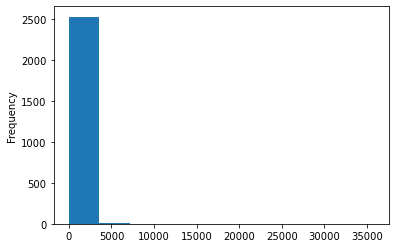

In [44]:
#checking most used value from AMT_INCOME_TOTAL
Application.AMT_INCOME_TOTAL.value_counts().plot.hist()
plt.show()

In [45]:
#checking the null values of AMT_REQ_CREDIT_BUREAU_HOUR from Application
Application.AMT_REQ_CREDIT_BUREAU_HOUR.isna().sum()

41519

In [46]:
#checking most used value from AMT_REQ_CREDIT_BUREAU_HOUR
Application.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [47]:
#checking the null values of AMT_REQ_CREDIT_BUREAU_DAY from Application
Application.AMT_REQ_CREDIT_BUREAU_DAY.isna().sum()

41519

In [48]:
#checking most used value from AMT_REQ_CREDIT_BUREAU_DAY
Application.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [49]:
#checking the null values of AMT_REQ_CREDIT_BUREAU_WEEK from Application
Application.AMT_REQ_CREDIT_BUREAU_WEEK.isna().sum()

41519

In [50]:
#checking most used value from AMT_REQ_CREDIT_BUREAU_WEEK
Application.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts()

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [51]:
#checking the null values of AMT_REQ_CREDIT_BUREAU_MON from Application
Application.AMT_REQ_CREDIT_BUREAU_MON.isna().sum()

41519

In [52]:
#checking most used value from AMT_REQ_CREDIT_BUREAU_MON
Application.AMT_REQ_CREDIT_BUREAU_MON.value_counts()

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [53]:
#checking the null values of AMT_REQ_CREDIT_BUREAU_MON from Application
Application.AMT_REQ_CREDIT_BUREAU_QRT.isna().sum()

41519

In [54]:
#checking most used value from AMT_REQ_CREDIT_BUREAU_QRT
Application.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [55]:
# filling null_values with mode(maximum values) for columns ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
Application.AMT_REQ_CREDIT_BUREAU_HOUR=Application['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(Application.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0])
Application.AMT_REQ_CREDIT_BUREAU_DAY=Application['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(Application.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0])
Application.AMT_REQ_CREDIT_BUREAU_WEEK=Application['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(Application.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0])
Application.AMT_REQ_CREDIT_BUREAU_MON=Application['AMT_REQ_CREDIT_BUREAU_MON'].fillna(Application.AMT_REQ_CREDIT_BUREAU_MON.mode()[0])
Application.AMT_REQ_CREDIT_BUREAU_QRT=Application['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(Application.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0])
Application.AMT_REQ_CREDIT_BUREAU_YEAR=Application['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(Application.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0])

In [56]:
#checking the null values of columns from Application
(Application.isna().sum().sort_values(ascending=False))

OCCUPATION_TYPE                96391
EXT_SOURCE_3                   60965
NAME_TYPE_SUITE                 1292
OBS_30_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
EXT_SOURCE_2                     660
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
CNT_FAM_MEMBERS                    2
DAYS_LAST_PHONE_CHANGE             1
FLAG_DOCUMENT_10                   0
FLAG_DOCUMENT_2                    0
FLAG_DOCUMENT_3                    0
FLAG_DOCUMENT_4                    0
FLAG_DOCUMENT_5                    0
FLAG_DOCUMENT_6                    0
FLAG_DOCUMENT_7                    0
FLAG_DOCUMENT_8                    0
FLAG_DOCUMENT_9                    0
SK_ID_CURR                         0
FLAG_DOCUMENT_11                   0
FLAG_DOCUMENT_20                   0
AMT_REQ_CREDIT_BUREAU_QRT          0
AMT_REQ_CREDIT_BUREAU_MON          0
AMT_REQ_CREDIT_BUREAU_WEEK         0
A

In [57]:
# We are dropping OCCUPATION_TYPE columns as there are 30% of null value present
Application.drop(['OCCUPATION_TYPE'],axis=1,inplace=True)

In [58]:
#checking the shape of Application
Application.shape

(307511, 72)

In [59]:
#checking most used value from EXT_SOURCE_3
Application.EXT_SOURCE_3.value_counts().describe()

count     814.000000
mean      302.882064
std       312.725944
min         1.000000
25%        27.250000
50%       170.000000
75%       543.000000
max      1460.000000
Name: EXT_SOURCE_3, dtype: float64

In [60]:
Application.EXT_SOURCE_3.value_counts().mode()

0    1
Name: EXT_SOURCE_3, dtype: int64

In [61]:
#describing the EXT_SOURCE_3 columns (checking after filling null value)
Application.EXT_SOURCE_3.value_counts().describe()

count     814.000000
mean      302.882064
std       312.725944
min         1.000000
25%        27.250000
50%       170.000000
75%       543.000000
max      1460.000000
Name: EXT_SOURCE_3, dtype: float64

In [62]:
# filling null_values with mode(maximum values) for columns ['EXT_SOURCE_3']
Application.EXT_SOURCE_3=Application['EXT_SOURCE_3'].fillna(Application.EXT_SOURCE_3.mode()[0])

In [63]:
#checking the null values of columns from Application
(Application.isna().sum().sort_values(ascending=False))

NAME_TYPE_SUITE                1292
DEF_60_CNT_SOCIAL_CIRCLE       1021
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
EXT_SOURCE_2                    660
AMT_GOODS_PRICE                 278
AMT_ANNUITY                      12
CNT_FAM_MEMBERS                   2
DAYS_LAST_PHONE_CHANGE            1
FLAG_DOCUMENT_2                   0
FLAG_DOCUMENT_10                  0
EXT_SOURCE_3                      0
FLAG_DOCUMENT_3                   0
FLAG_DOCUMENT_4                   0
FLAG_DOCUMENT_5                   0
FLAG_DOCUMENT_6                   0
FLAG_DOCUMENT_7                   0
FLAG_DOCUMENT_8                   0
FLAG_DOCUMENT_9                   0
SK_ID_CURR                        0
FLAG_DOCUMENT_11                  0
FLAG_DOCUMENT_20                  0
AMT_REQ_CREDIT_BUREAU_QRT         0
AMT_REQ_CREDIT_BUREAU_MON         0
AMT_REQ_CREDIT_BUREAU_WEEK        0
AMT_REQ_CREDIT_BUREAU_DAY         0
AMT_REQ_CREDIT_BUREAU_HOUR  

In [64]:
#checking most used value from NAME_TYPE_SUITE
Application.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [65]:
# filling null_values with mode(maximum values) for columns ['NAME_TYPE_SUITE']
Application.NAME_TYPE_SUITE=Application['NAME_TYPE_SUITE'].fillna(Application.NAME_TYPE_SUITE.mode()[0])

In [66]:
#checking most used value from NAME_TYPE_SUITE(after filling up the null values)
Application.NAME_TYPE_SUITE.value_counts(normalize=True)

Unaccompanied      0.812387
Family             0.130561
Spouse, partner    0.036974
Children           0.010624
Other_B            0.005756
Other_A            0.002816
Group of people    0.000881
Name: NAME_TYPE_SUITE, dtype: float64

In [67]:
#checking the null values of columns from Application
(Application.isna().sum()*100/len(Application)).sort_values(ascending=False)

DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_10               0.000000
EXT_SOURCE_3                   0.000000
FLAG_DOCUMENT_3                0.000000
FLAG_DOCUMENT_4                0.000000
FLAG_DOCUMENT_5                0.000000
FLAG_DOCUMENT_6                0.000000
FLAG_DOCUMENT_7                0.000000
FLAG_DOCUMENT_8                0.000000
FLAG_DOCUMENT_9                0.000000
SK_ID_CURR                     0.000000
FLAG_DOCUMENT_11               0.000000
FLAG_DOCUMENT_20               0.000000
AMT_REQ_CREDIT_BUREAU_QRT      0.000000
AMT_REQ_CREDIT_BUREAU_MON      0.000000
AMT_REQ_CREDIT_BUREAU_WEEK     0.000000


In [68]:
# filling null_values with mode(maximum values) for columns ['DEF_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','EXT_SOURCE_2','AMT_GOODS_PRICE','AMT_ANNUITY','CNT_FAM_MEMBERS','DAYS_LAST_PHONE_CHANGE']
Application.DEF_60_CNT_SOCIAL_CIRCLE=Application['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(Application.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0])
Application.OBS_30_CNT_SOCIAL_CIRCLE=Application['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(Application.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0])
Application.DEF_30_CNT_SOCIAL_CIRCLE=Application['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(Application.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0])
Application.OBS_60_CNT_SOCIAL_CIRCLE=Application['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(Application.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0])
Application.EXT_SOURCE_2=Application['EXT_SOURCE_2'].fillna(Application.EXT_SOURCE_2.mode()[0])
Application.AMT_GOODS_PRICE=Application['AMT_GOODS_PRICE'].fillna(Application.AMT_GOODS_PRICE.mode()[0])
Application.AMT_ANNUITY =Application['AMT_ANNUITY'].fillna(Application.AMT_ANNUITY.mode()[0])
Application.CNT_FAM_MEMBERS=Application['CNT_FAM_MEMBERS'].fillna(Application.CNT_FAM_MEMBERS.mode()[0])
Application.DAYS_LAST_PHONE_CHANGE=Application['DAYS_LAST_PHONE_CHANGE'].fillna(Application.DAYS_LAST_PHONE_CHANGE.mode()[0])

In [69]:
#checking the null values of columns from Application
(Application.isna().sum()*100/len(Application)).sort_values(ascending=False)

SK_ID_CURR                     0.0
TARGET                         0.0
FLAG_DOCUMENT_8                0.0
FLAG_DOCUMENT_7                0.0
FLAG_DOCUMENT_6                0.0
FLAG_DOCUMENT_5                0.0
FLAG_DOCUMENT_4                0.0
FLAG_DOCUMENT_3                0.0
FLAG_DOCUMENT_2                0.0
DAYS_LAST_PHONE_CHANGE         0.0
DEF_60_CNT_SOCIAL_CIRCLE       0.0
OBS_60_CNT_SOCIAL_CIRCLE       0.0
DEF_30_CNT_SOCIAL_CIRCLE       0.0
OBS_30_CNT_SOCIAL_CIRCLE       0.0
EXT_SOURCE_3                   0.0
EXT_SOURCE_2                   0.0
ORGANIZATION_TYPE              0.0
FLAG_DOCUMENT_9                0.0
FLAG_DOCUMENT_10               0.0
FLAG_DOCUMENT_11               0.0
FLAG_DOCUMENT_20               0.0
AMT_REQ_CREDIT_BUREAU_QRT      0.0
AMT_REQ_CREDIT_BUREAU_MON      0.0
AMT_REQ_CREDIT_BUREAU_WEEK     0.0
AMT_REQ_CREDIT_BUREAU_DAY      0.0
AMT_REQ_CREDIT_BUREAU_HOUR     0.0
FLAG_DOCUMENT_21               0.0
FLAG_DOCUMENT_19               0.0
FLAG_DOCUMENT_12    

# UNIVARIATE ANALYSIS

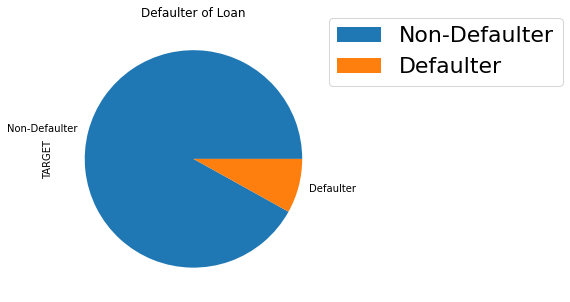

In [70]:
plt.figure(figsize=[6,5] )
l=['Non-Defaulter','Defaulter']
Application.TARGET.value_counts(normalize=True).plot.pie(labels=l)
plt.title('Defaulter of Loan')
plt.legend(bbox_to_anchor=(0.8, 0.8), loc="center left", fontsize=22, bbox_transform=plt.gcf().transFigure)
plt.show()

# Conclusion 
#### we observe that most of customers are non- defaulter

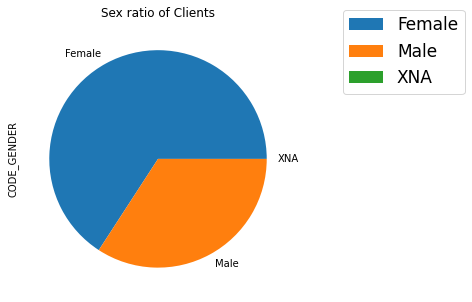

In [71]:
plt.figure(figsize=[7,5] )
l=['Female','Male','XNA']
Application.CODE_GENDER.value_counts(normalize=True).plot.pie(labels=l)
plt.title('Sex ratio of Clients')
plt.legend(bbox_to_anchor=(1, 0.8), loc="center", fontsize=17, bbox_transform=plt.gcf().transFigure)
plt.show()

# Conclusion 
#### we observe that most of applicant are female

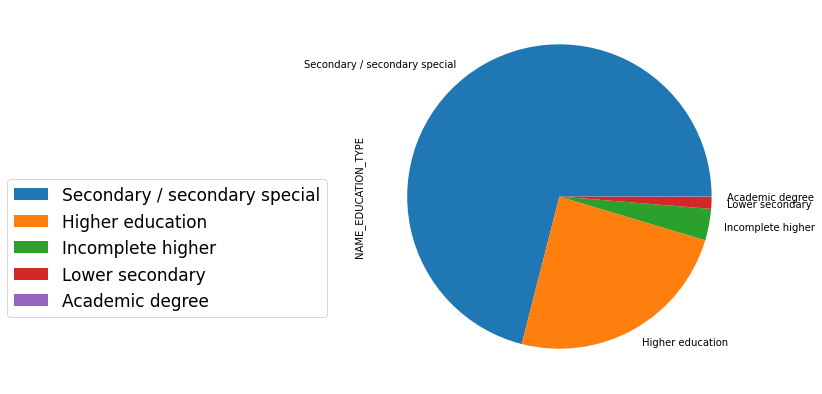

In [72]:
plt.figure(figsize=[7,7] )
Application.NAME_EDUCATION_TYPE.value_counts(normalize=False).plot.pie()
plt.legend(bbox_to_anchor=(-0.6, 0.4), loc="center left", fontsize=17, bbox_transform=plt.gcf().transFigure)
plt.show()

# Conclusion 
#### we observe that most of applicant have educational background of Secondary/secondary special.

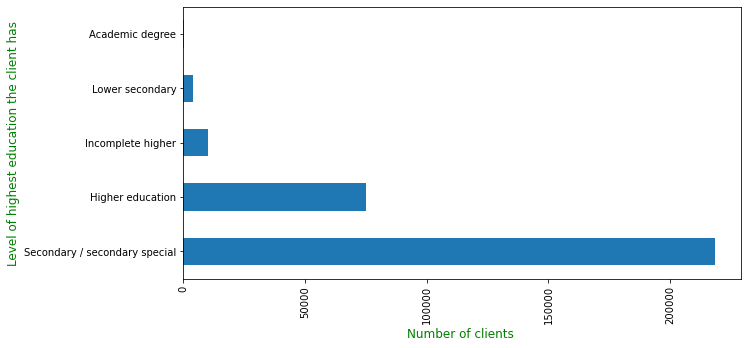

In [73]:
plt.figure(figsize=[10,5] )
Application.NAME_EDUCATION_TYPE.value_counts(normalize=False).plot.barh()
plt.xticks(rotation=90)
plt.xlabel('Number of clients ',fontdict={'fontsize':12,'fontweight':4,'color':'Green'})
plt.ylabel('Level of highest education the client has',fontdict={'fontsize':12,'fontweight':4,'color':'Green'})
plt.show()

# Conclusion 
#### we observe that most of applicant have educational background of Secondary/secondary special with 20000+ clients belong to that section

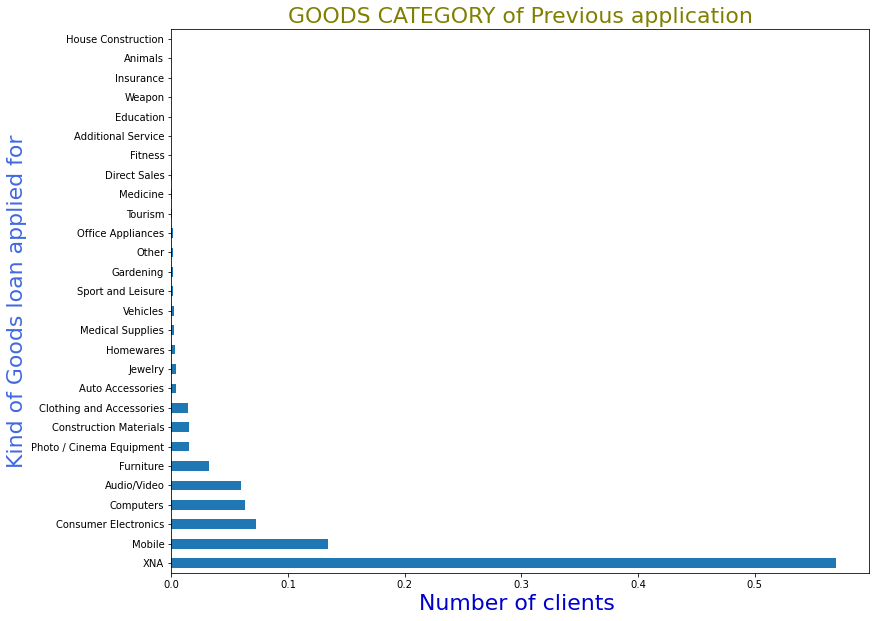

In [74]:
plt.figure(figsize=[12.5,10] )
Previous.NAME_GOODS_CATEGORY.value_counts(normalize=True).plot.barh()
plt.title('GOODS CATEGORY of Previous application',fontdict={'fontsize':22,'fontweight':7,'color':'olive'})
plt.xlabel('Number of clients ',fontdict={'fontsize':22,'fontweight':7,'color':'mediumblue'})
plt.ylabel('Kind of Goods loan applied for',fontdict={'fontsize':22,'fontweight':7,'color':'royalblue'})
plt.show()

# Conclusion 
### we observe that most of our client from previous data took loan for unnamed reason which we can consider as personsal loan.

### Loan Annunity
The loan annunity is given on contract basis jobs. The less paid are jobs have the highest loan annunity. The means and median is all most nearer to each other which you will able to see in below graphs

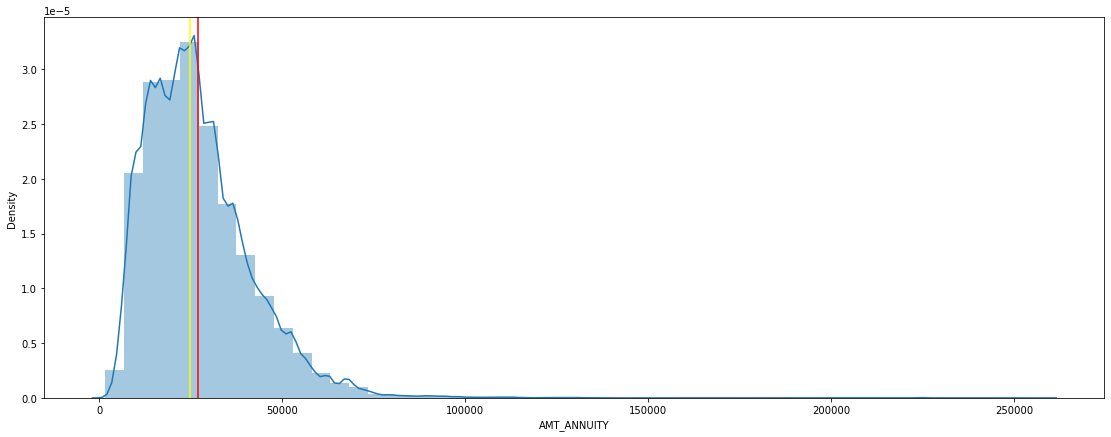

In [75]:
plt.figure(figsize=[19,7] )
sns.distplot(Application.AMT_ANNUITY)
plt.axvline(Application.AMT_ANNUITY.mean(), color='red')
plt.axvline(Application.AMT_ANNUITY.median(), color='yellow')
plt.show()

 ### ORGANIZATION
* We will see which organization does our client works

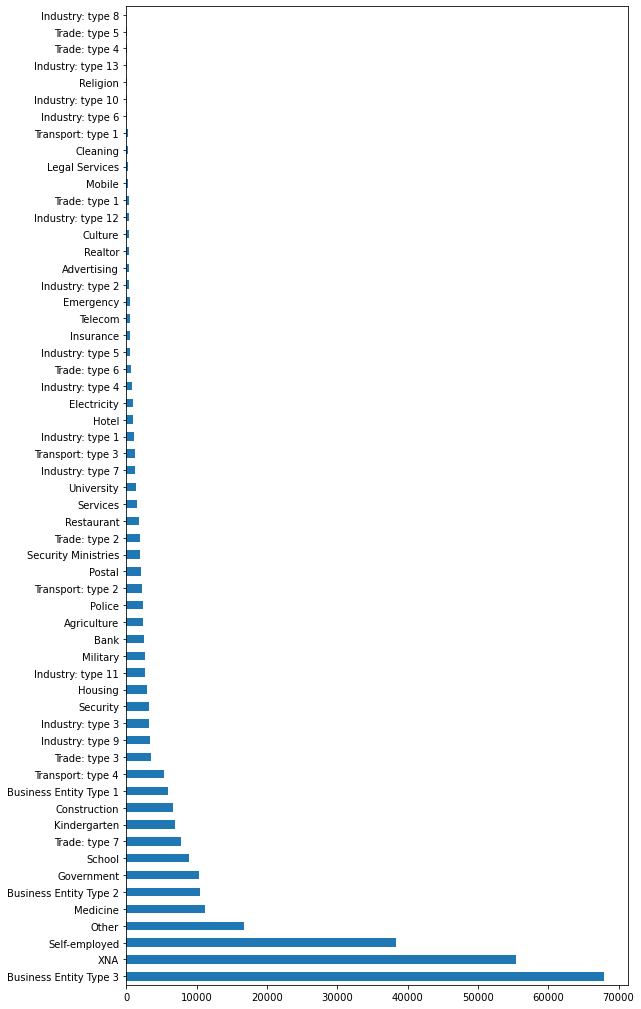

In [76]:
plt.figure(figsize=[9,18] )
Application.ORGANIZATION_TYPE.value_counts().plot.barh()
plt.show()

#### Conclusion 
* We saw that most of our clients belongs to Business Entity Type 3
* Suprisingly many of clients didn't mentioned the Organisation Names. 

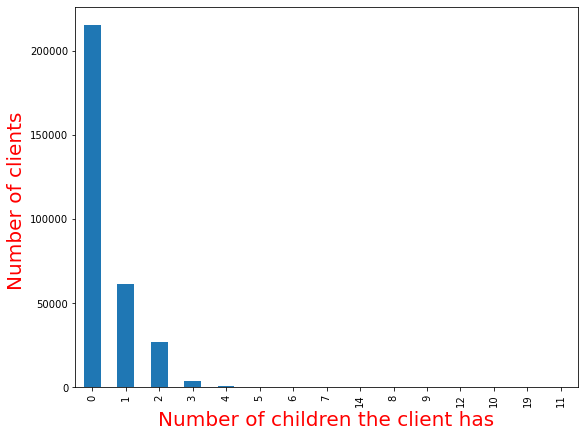

In [77]:
# Clients VS number of Children 
plt.figure(figsize=[9,7] )
Application.CNT_CHILDREN.value_counts().plot.bar()
plt.xlabel('Number of children the client has',fontdict={'fontsize':20,'fontweight':4,'color':'Red'})
plt.ylabel('Number of clients ',fontdict={'fontsize':20,'fontweight':4,'color':'Red'})
plt.show()

# Conclusion 
#### we observe that applicant who have less count of children applied loan. Number of children can be considered as causation.

### Credit Amount
Let see which loan amount is asked by clients for most of the times. 

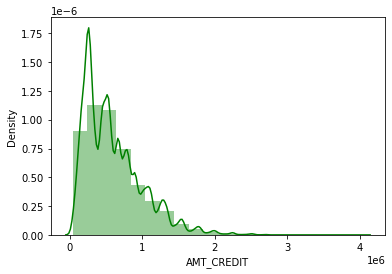

In [78]:
sns.distplot(Application.AMT_CREDIT,bins=20,color='g')
plt.show()

### Distplot doesn't explain anything
## lets distribute Credit amount in numberic category and naming it Loan AMT 

In [79]:
Application['Loan_AMT']= pd.cut(Application.AMT_CREDIT,[0,30000,60000,90000,1200000,99999999],labels= ["less than 30K","30K-60K","60K-90K","90K-1.20M", "more than 1.2 Million"])

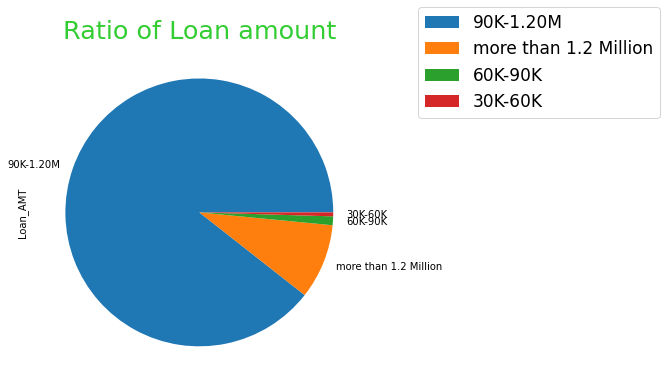

In [80]:
plt.figure(figsize=[6,7] )
Application.Loan_AMT.value_counts(normalize=True).plot.pie()
plt.legend(bbox_to_anchor=(1, 0.8), loc="center left", fontsize=17, bbox_transform=plt.gcf().transFigure)
plt.title('Ratio of Loan amount',fontdict={'fontsize':25.5,'fontweight':7,'color':'limegreen'})
plt.show()

# Conclusion 
#### we observe that applicant has choosen for 90K-1.20 million amount of loans  

### Let check income type of applicant

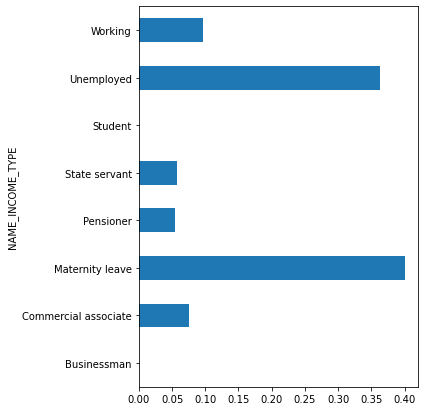

In [81]:
plt.figure(figsize=[5,7] )
Application.groupby('NAME_INCOME_TYPE')["TARGET"].mean().plot.barh()
plt.show()

# Conclusion 
#### we observe that applicant who is unemployed or on maternity leaves choosen to take loan. as they don't have source of income.

### Let check how much loan were approved by us from previous data

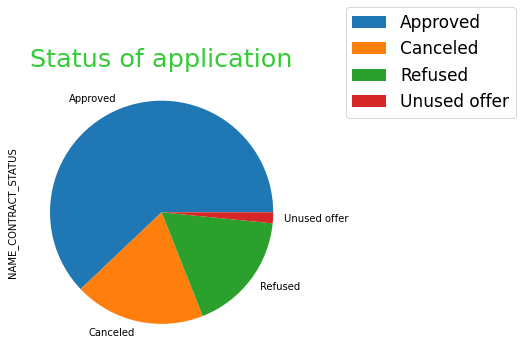

In [82]:
plt.figure(figsize=[5,7] )
Previous.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.pie()
plt.legend(bbox_to_anchor=(1, 0.8), loc="center left", fontsize=17, bbox_transform=plt.gcf().transFigure)
plt.title('Status of application',fontdict={'fontsize':25.5,'fontweight':7,'color':'limegreen'})
plt.show()

# Conclusion 
#### we observe that we will that approval is high but not good figure. We also rejected the application also

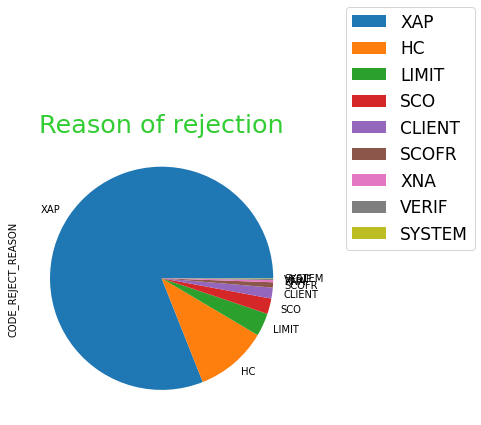

In [83]:
plt.figure(figsize=[5,7] )
Previous.CODE_REJECT_REASON.value_counts(normalize=True).plot.pie()
plt.legend(bbox_to_anchor=(1, 0.8), loc="center left", fontsize=17, bbox_transform=plt.gcf().transFigure)
plt.title('Reason of rejection',fontdict={'fontsize':25.5,'fontweight':7,'color':'limegreen'})
plt.show()

# Conclusion 
#### we observe that we will that reason of rejection of loan are not mentioned many a times

# Bivariate and Multivariate Analysis

In [84]:
cat_cols = ['NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS','NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
cat_cols

['NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY']

In [85]:
for c in cat_cols:
    print(Application[c].value_counts())
    print("."*60)
    print(Application[c].value_counts(normalize=True)*100)
    print("="*60)

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64
............................................................
Secondary / secondary special    71.018923
Higher education                 24.344820
Incomplete higher                 3.341994
Lower secondary                   1.240931
Academic degree                   0.053331
Name: NAME_EDUCATION_TYPE, dtype: float64
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64
............................................................
Married                 63.878040
Single / not married    14.778008
Civil marriage           9.682580
Separated                6.429038
Widow               

#### TARGET VS AMOUNT

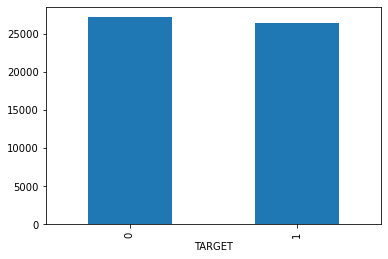

In [86]:
Application.groupby(['TARGET'])["AMT_ANNUITY"].mean().plot.bar()
plt.show()

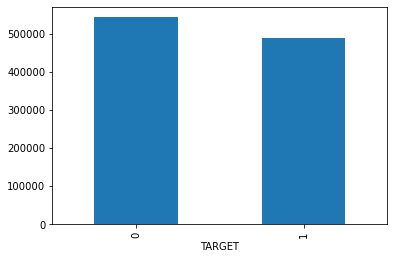

In [87]:
Application.groupby(['TARGET'])["AMT_GOODS_PRICE"].mean().plot.bar()
plt.show()

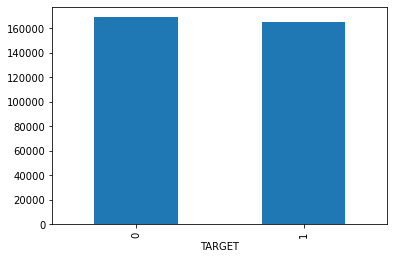

In [88]:
Application.groupby(['TARGET'])["AMT_INCOME_TOTAL"].mean().plot.bar()
plt.show()

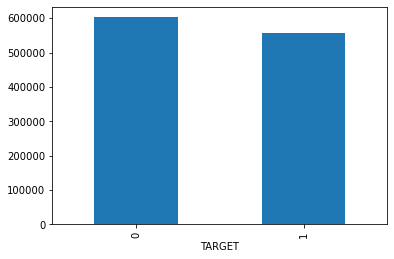

In [89]:
Application.groupby(['TARGET'])["AMT_CREDIT"].mean().plot.bar()
plt.show()

### CONCLUSION from above analysis
• In above analysis we saw that there were less difference between Target and Amounts
• We can't find any relationship between Amount and Target Variables
• Lets see if could find any relationship between other Amounts variable

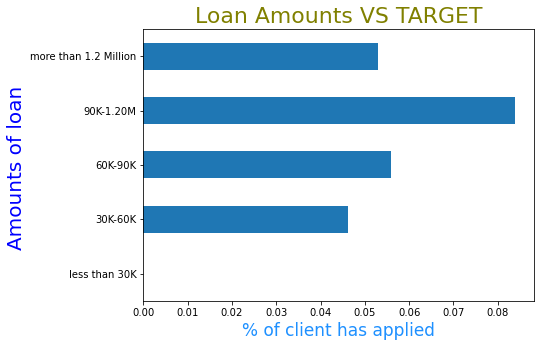

In [90]:
plt.figure(figsize=[7,5] )
Application.groupby(['Loan_AMT'])['TARGET'].mean().plot.barh()
plt.title('Loan Amounts VS TARGET',fontdict={'fontsize':22,'fontweight':7,'color':'olive'})
plt.xlabel('% of client has applied',fontdict={'fontsize':17,'fontweight':6,'color':'dodgerblue'})
plt.ylabel('Amounts of loan ',fontdict={'fontsize':20,'fontweight':4,'color':'blue'})
plt.show()

#### Loan Amount vs Target
* we see that most of our target customer opted for the 90k-1.20M

### Let check how much Credit amount VS Loan Annuity VS Application Ammount has co-relation from Previous data

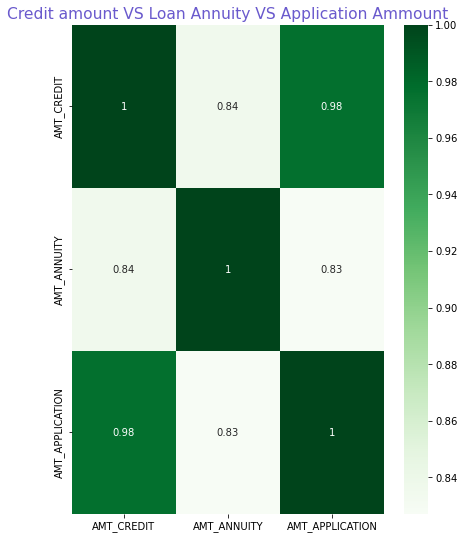

In [91]:
plt.figure(figsize=[7,9] )
sns.heatmap(Previous[["AMT_CREDIT", "AMT_ANNUITY","AMT_APPLICATION",]].corr(), annot= True, cmap= "Greens")
plt.title('Credit amount VS Loan Annuity VS Application Ammount',fontdict={'fontsize':15.5,'fontweight':7,'color':'slateblue'})
plt.show()

### CONCLUSION from above analysis
• In above analysis we saw that all 'Credit amount VS Loan Annuity VS Application Ammount' has good correlation between them.


### Let check how much Total Income of Client VS Credit amount VS Loan Annuity VS GOODS_PRICE Ammount has co-relation from Previous data

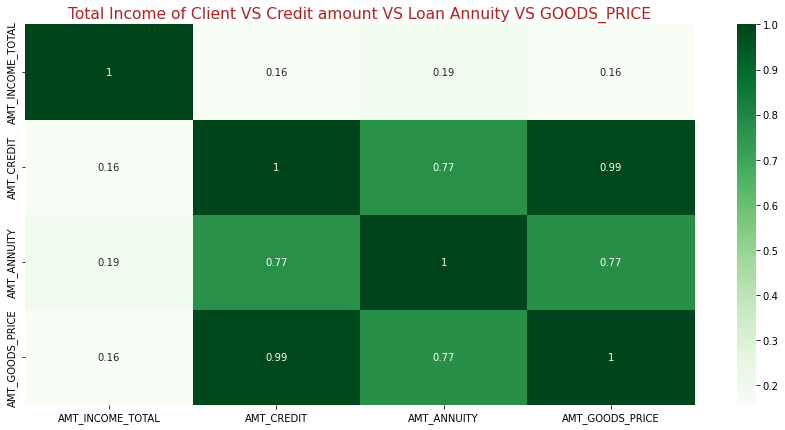

In [92]:
plt.figure(figsize=[15,7] )
sns.heatmap(Application[["AMT_INCOME_TOTAL","AMT_CREDIT", "AMT_ANNUITY",'AMT_GOODS_PRICE']].corr(), annot= True, cmap= "Greens")
plt.title('Total Income of Client VS Credit amount VS Loan Annuity VS GOODS_PRICE',fontdict={'fontsize':15.5,'fontweight':7,'color':'firebrick'})
plt.show()

### CONCLUSION from above analysis
* we observe that Income client of client has weak relationship with other variables.
• In above analysis we saw that all Credit amount VS Loan Annuity VS GOODS_PRICE Ammount has good correlation between them.


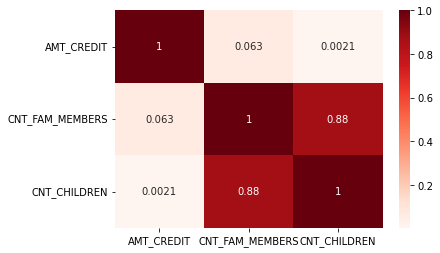

In [93]:
# We will checking is there any relationship between Credit amount VS Family counts and Children counts.
sns.heatmap( Application[["AMT_CREDIT","CNT_FAM_MEMBERS", "CNT_CHILDREN"]].corr(), annot= True, cmap= "Reds")
plt.show()

#### Conclusion
‣ The amount of loans doesn't depends on the Size of family.

### Let check Organisation VS Target

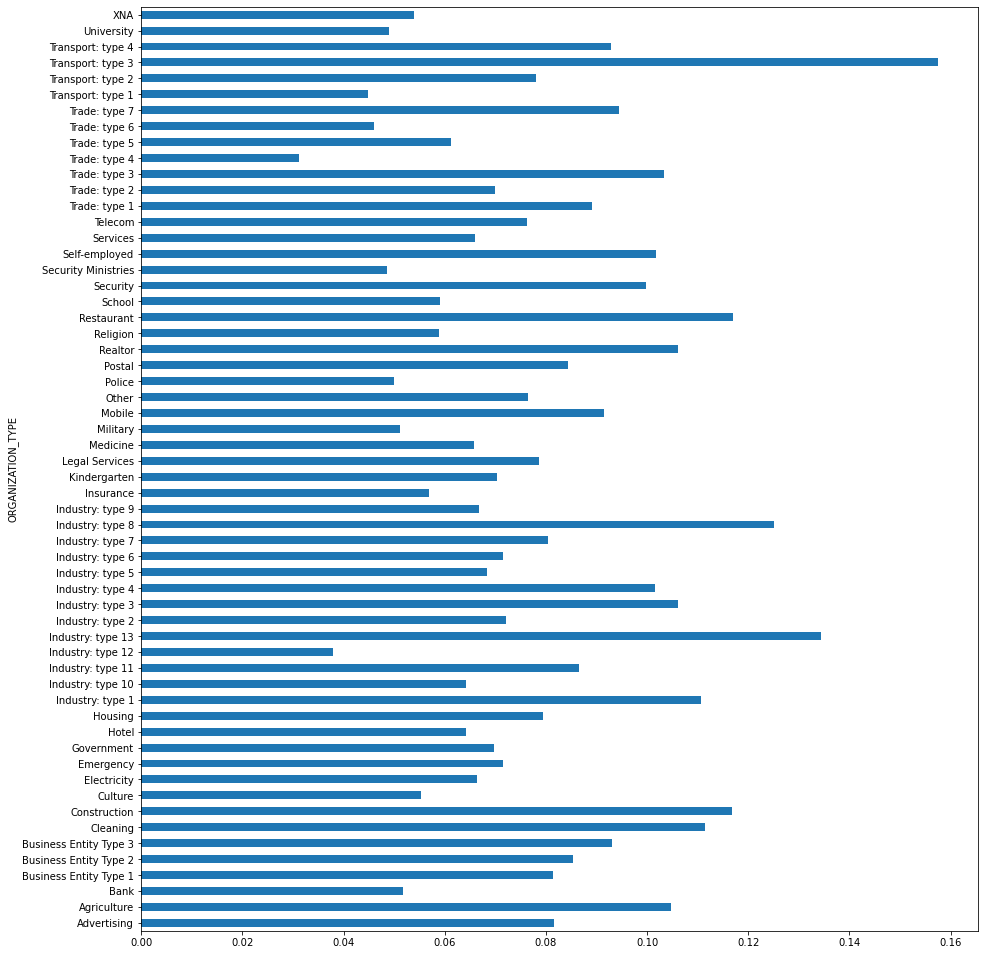

In [94]:
plt.figure(figsize=[15,17] )
Application.groupby('ORGANIZATION_TYPE')["TARGET"].mean().plot.barh()
plt.show()

#### Conclusion
we have non-defauler for almost each and every organisation.

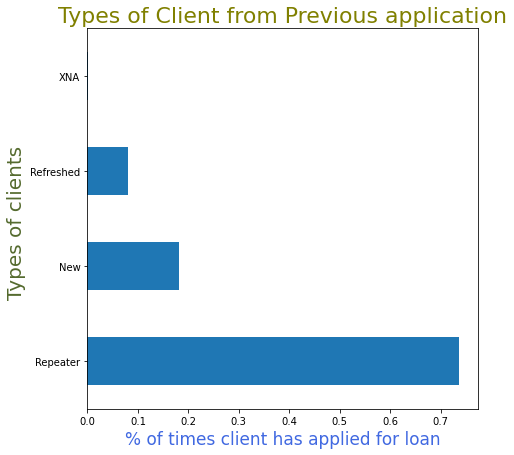

In [95]:
plt.figure(figsize=[7,7] )
Previous.NAME_CLIENT_TYPE.value_counts(normalize=True).plot.barh()
plt.title('Types of Client from Previous application',fontdict={'fontsize':22,'fontweight':7,'color':'olive'})
plt.xlabel('% of times client has applied for loan',fontdict={'fontsize':17,'fontweight':6,'color':'royalblue'})
plt.ylabel('Types of clients ',fontdict={'fontsize':20,'fontweight':4,'color':'darkolivegreen'})
plt.show()

#### Conclusion
‣ Most of our client are repeater which also means that they do like our services.

# Merging both Previous and Appliction Data on the basis of SK_ID_CURR

In [96]:
merged=Application.merge(Previous,on=["SK_ID_CURR"],how='inner')

In [97]:
#checking first five row
merged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Loan_AMT,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,90K-1.20M,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.746300,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,more than 1.2 Million,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.746300,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,more than 1.2 Million,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.746300,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,more than 1.2 Million,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,

In [98]:
#Checking the shape of merged data
merged.shape

(1413701, 98)

### Let check the types of client vs Target 

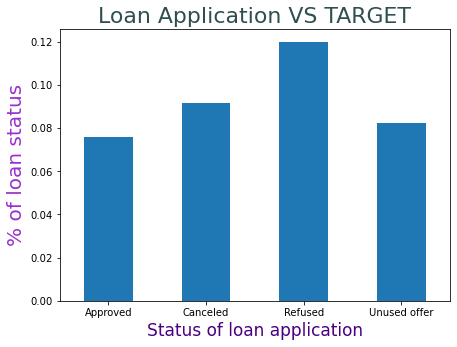

In [99]:
plt.figure(figsize=[7,5] )
merged.groupby(['NAME_CONTRACT_STATUS'])['TARGET'].mean().plot.bar()
plt.title('Loan Application VS TARGET',fontdict={'fontsize':22,'fontweight':7,'color':'darkslategray'})
plt.xlabel('Status of loan application',fontdict={'fontsize':17,'fontweight':6,'color':'indigo'})
plt.ylabel('% of loan status',fontdict={'fontsize':20,'fontweight':4,'color':'darkorchid'})
plt.xticks(rotation=0)
plt.show()

#### Conclusion
‣ Most of our client are repeater who were refused from giving loans.

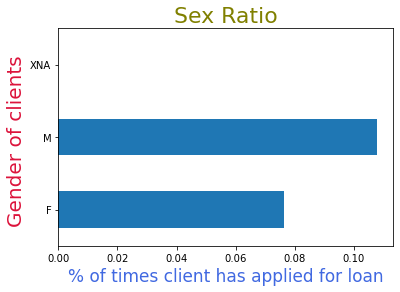

In [100]:
merged.groupby('CODE_GENDER')["TARGET"].mean().plot.barh()
plt.title('Sex Ratio',fontdict={'fontsize':22,'fontweight':7,'color':'olive'})
plt.xlabel('% of times client has applied for loan',fontdict={'fontsize':17,'fontweight':6,'color':'royalblue'})
plt.ylabel('Gender of clients ',fontdict={'fontsize':20,'fontweight':4,'color':'crimson'})
plt.show()

#### Conclusion
‣ Most of our male client are non-deafaulters

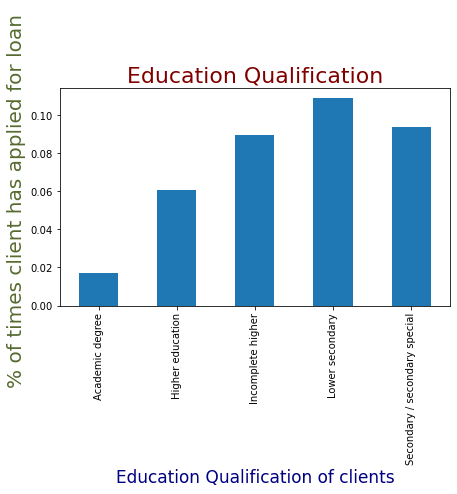

In [101]:
plt.figure(figsize=[7,4] )
merged.groupby('NAME_EDUCATION_TYPE')["TARGET"].mean().plot.bar()
plt.title('Education Qualification',fontdict={'fontsize':22,'fontweight':7,'color':'maroon'})
plt.xlabel('Education Qualification of clients',fontdict={'fontsize':17,'fontweight':6,'color':'navy'})
plt.ylabel('% of times client has applied for loan ',fontdict={'fontsize':20,'fontweight':4,'color':'darkolivegreen'})
plt.xticks(rotation=90)
plt.show()

#### Conclusion
‣ Most of our client who have lower secondary education are non-defaulter.

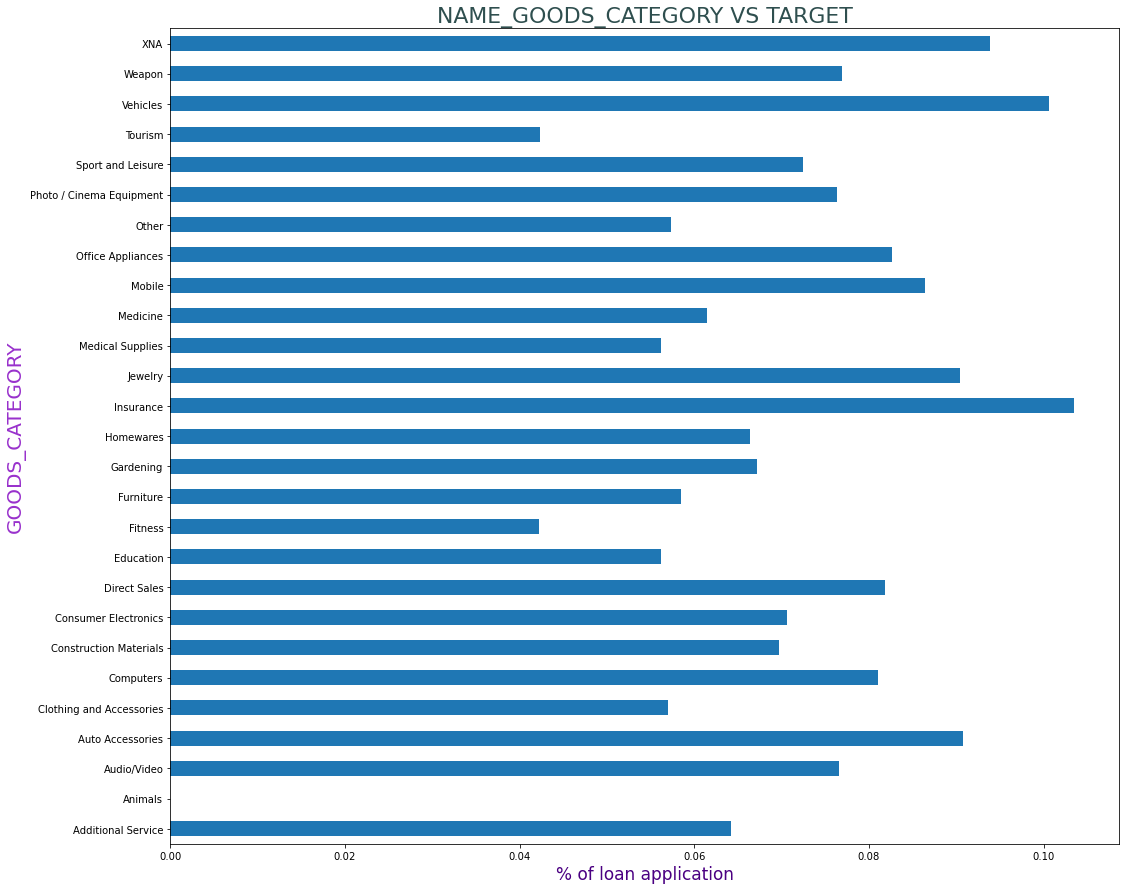

In [102]:
plt.figure(figsize=[17,15] )
merged.groupby(['NAME_GOODS_CATEGORY'])['TARGET'].mean().plot.barh()
plt.title('NAME_GOODS_CATEGORY VS TARGET',fontdict={'fontsize':22,'fontweight':7,'color':'darkslategray'})
plt.xlabel('% of loan application',fontdict={'fontsize':17,'fontweight':6,'color':'indigo'})
plt.ylabel('GOODS_CATEGORY',fontdict={'fontsize':20,'fontweight':4,'color':'darkorchid'})
plt.xticks(rotation=0)
plt.show()

#### Conclusion
we have non-defauler for almost each and every organisation.

# Multivariate Analysis

### Education VS CONTRACT STATUS VS TARGET

In [103]:
res=pd.pivot_table(data=merged, index="NAME_EDUCATION_TYPE", columns="NAME_CONTRACT_STATUS", values="TARGET")
res

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_EDUCATION_TYPE,,,,
Academic degree,0.014354,0.000000,0.010989,0.500000
Higher education,0.052282,0.064197,0.085401,0.066687
Incomplete higher,0.077649,0.101554,0.117082,0.099695
Lower secondary,0.095434,0.125847,0.139684,0.115152
Secondary / secondary special,0.082583,0.099024,0.130231,0.087992


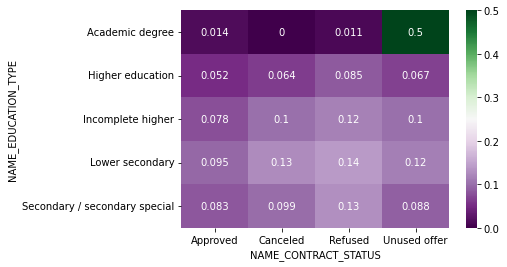

In [104]:
sns.heatmap(res, annot= True, cmap="PRGn")
plt.show()

### Conclusion
We didn't draw any conclusion from this graph

In [105]:
res2=pd.pivot_table(data=merged, index="NAME_FAMILY_STATUS", columns="NAME_CONTRACT_STATUS", values="TARGET")
res2

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_FAMILY_STATUS,,,,
Civil marriage,0.090594,0.107754,0.138100,0.093830
Married,0.072763,0.089647,0.117785,0.075280
Separated,0.074784,0.089991,0.114933,0.080000
Single / not married,0.090425,0.106577,0.133413,0.107545
Widow,0.054470,0.058473,0.080761,0.060927


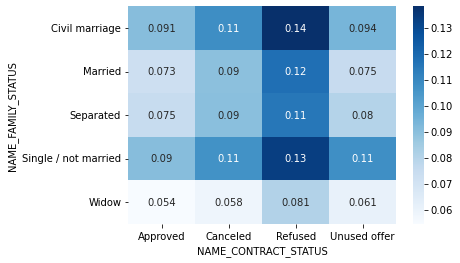

In [106]:
sns.heatmap(res2, annot= True, cmap="Blues")
plt.show()

### Conclusion
we saw civil marriaage and single/not married has most refusal rates.

In [107]:
res3=pd.pivot_table(data=merged, index="NAME_GOODS_CATEGORY", columns="NAME_CONTRACT_STATUS", values="TARGET")
res3

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_GOODS_CATEGORY,,,,
Additional Service,0.041237,NaN,0.250000,NaN
Animals,0.000000,NaN,NaN,NaN
Audio/Video,0.074275,0.041667,0.102345,0.055489
Auto Accessories,0.087380,0.000000,0.117750,0.118644
Clothing and Accessories,0.053963,NaN,0.090085,0.055556
Computers,0.076217,0.153846,0.110676,0.086430
Construction Materials,0.066357,0.200000,0.099244,0.078431
Consumer Electronics,0.068266,0.142857,0.102200,0.055351
Direct Sales,0.068592,NaN,0.153846,0.000000


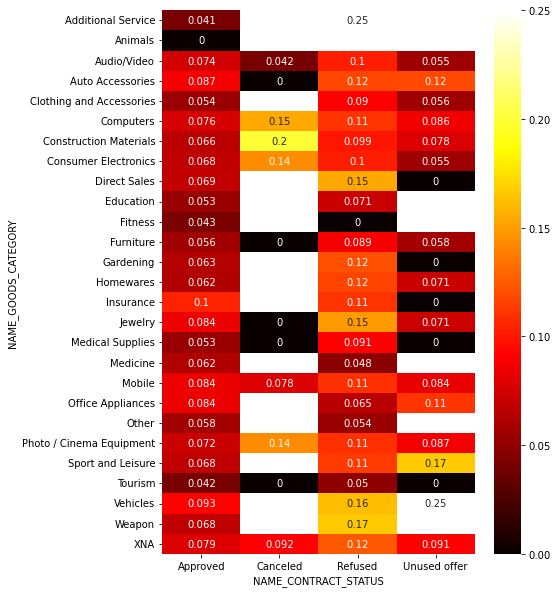

In [108]:
plt.figure(figsize=[7,10] )
sns.heatmap(res3, annot= True, cmap="hot")
plt.show()

### Conclusion
We didn't draw any conclusion from this graph

In [109]:
res4=pd.pivot_table(data=merged, index="NAME_CLIENT_TYPE", columns="NAME_CONTRACT_STATUS", values="TARGET")
res4

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_CLIENT_TYPE,,,,
New,0.088216,0.145205,0.110940,0.089448
Refreshed,0.065158,0.081098,0.117412,0.074324
Repeater,0.072144,0.091767,0.120596,0.083338
XNA,0.071264,0.101377,0.135714,0.103448


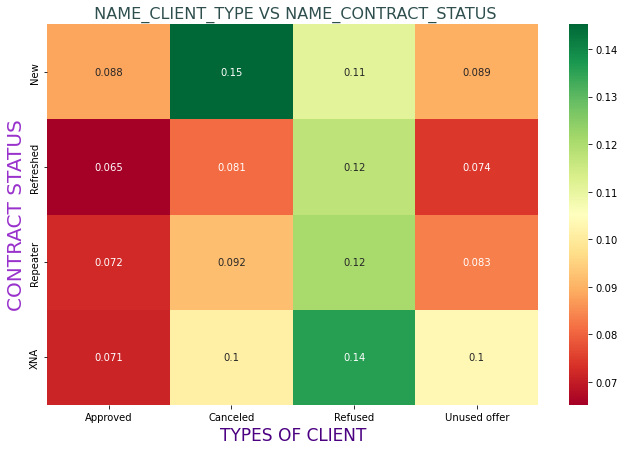

In [110]:
plt.figure(figsize=[11,7] )
sns.heatmap(res4, annot= True, cmap="RdYlGn")
plt.title(' NAME_CLIENT_TYPE VS NAME_CONTRACT_STATUS',fontdict={'fontsize':16,'fontweight':7,'color':'darkslategray'})
plt.xlabel('TYPES OF CLIENT',fontdict={'fontsize':17,'fontweight':6,'color':'indigo'})
plt.ylabel('CONTRACT STATUS',fontdict={'fontsize':20,'fontweight':4,'color':'darkorchid'})
plt.show()

### Conclusion
- We see that for most of new customer loans got cancelled whereas unknown customer were refused from loan

## CODE_REJECT_REASON VS CODE_REJECT_REASON VS TARGET

In [111]:
res5=pd.pivot_table(data=merged, index="CODE_REJECT_REASON", columns="NAME_CONTRACT_STATUS", values="TARGET")
res5

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
CODE_REJECT_REASON,,,,
CLIENT,NaN,NaN,NaN,0.082517
HC,NaN,NaN,0.117342,NaN
LIMIT,NaN,NaN,0.125594,NaN
SCO,NaN,NaN,0.099982,NaN
SCOFR,NaN,NaN,0.209287,NaN
SYSTEM,NaN,NaN,0.062500,NaN
VERIF,NaN,NaN,0.092563,NaN
XAP,0.075887,0.091736,0.000000,NaN
XNA,0.000000,NaN,0.101144,NaN


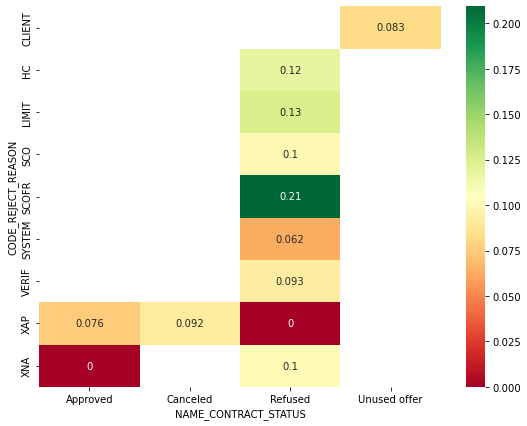

In [112]:
plt.figure(figsize=[9,7] )
sns.heatmap(res5, annot= True, cmap="RdYlGn")
plt.show()

### Conclusion
We didn't draw any conclusion from this graph

In [113]:
Loan AMT VS NAME_CONTRACT_STATUS VS TARGET

SyntaxError: invalid syntax (520878180.py, line 1)

In [ ]:
res6=pd.pivot_table(data=merged, index="Loan_AMT", columns="NAME_CONTRACT_STATUS", values="TARGET")
res6

In [ ]:
plt.figure(figsize=[9,7] )
sns.heatmap(res6, annot= True, cmap="rocket")
plt.show()

## Conclusion
* We saw that used were for 60-90k and 30-60k.
* We saw that most of the times refuesal were made for 90k-1.20M though it is most asked offer but it more non-defaulter.  

## Loan_AMT VS NAME_FAMILY_STATUS

In [ ]:
res7=pd.pivot_table(data=merged, index="Loan_AMT", columns="NAME_FAMILY_STATUS", values="TARGET")
res7

In [ ]:
plt.figure(figsize=[9,7] )
sns.heatmap(res7, annot= True, cmap="Blues_r")
plt.show()

### Conclusion
* We saw that civil marriage took most of the loans and they were non-defaulter too.
* widow did apoted for highest amount or lowest amount and they were non-defaulter. 

# THANK YOU